In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
import pandas_profiling
from matplotlib.pyplot import figure
import matplotlib as matplotlib
%matplotlib inline

In [2]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.set(style="whitegrid")

In [3]:
order_leads = pd.read_csv('order_leads.csv') 
sales_team =pd.read_csv('sales_team.csv')
invoices =pd.read_csv('invoices.csv')

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-success">
    
Описние задания. <br>
Бизнес модель компании следующая:
   1. Компания осуществляет заказа
   2. Команда продаж помещает заказ в систему
   3. Торговые представители пытаются организовать встречу, которая происходит примерно в то время, когда был замечен заказ
   4. Торговые представители имеют бюджет расходов и всегда объединяют встречу с едой, за которую они платят

<br>
</div>


<div class="alert alert-block alert-success">   
    
   5. Торговые представители оплачивают свои расходы и передают счета в бухгалтерию для обработки
   6. После встречи, как потенциальный клиент решает, согласен ли он с предложенными условиями сделки или нет
   7. После решения данные сделке ( заключена или нет) вносятся в систему


<font color='blue'>Цель: выяснить каким образом повысить конверсию сделок</font> <br>

### В рамках данного задания, нам представлены 3 набора данных, с следующими столбацами:


#### 1. order_leads - содержит все потенциальные заказы и информацию о конверсии
* Order ID - уникальны номер заказ
* Company Id - уникальный номер компании, от которой поступил заказ
* Company Name - наименование компании
* Date - дата, когда заказ был совершен
* Order Value - cтоимость заказа 
* Converted - данные о конверсии в виде 1 и 0 где
    * 1 - сделка заключена
    * 2 - сделка не состоялась


In [4]:
order_leads.head(2)

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0


#### 2. sales_team - содержит компании и ответственных торговых представителей, работающих с данными компаниями
* Sales Rep Id - идентификатор торгового представителя
* Sales Rep - имя торгового представителя
* Company Id - идентификатор компании, с которой работает торговый представитель 
* Company Name - название компании   

In [5]:
sales_team.head(2)

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII


#### 3. invoices - содержит информацию о всречах со счетами за обед и участниками встречи
* Meal Id - уникальный номер встречи/ обеда
* Company Id - идентификатор компании, с представителями которой осуществляется встреча.
* Date of Meal - дата, когда была осуществлена встреча с указанием времени встречи
* Participants - участники встречи, со стороны компании
* Meal Price - стоимость обеда

In [6]:
invoices.head(2)

,Meal Id,Company Id,Date of Meal,Participants,Meal Price
0,QBGU1W8BRZZFHYUZ,D0AUXPP07H6AVSGD,2017-10-09 21:00:00,['Violet Medina'],598.0
1,QFNO07V7P3BTJSDK,D0AUXPP07H6AVSGD,2018-06-07 07:00:00,['Connie Harper'],89.0


#### Проверим качество данных

In [7]:
sales_team.isnull().sum().sort_values(ascending = False).head()

Company Id      0
Company Name    0
Sales Rep Id    0
Sales Rep       0
dtype: int64

In [8]:
order_leads.isnull().sum().sort_values(ascending = False).head()

Converted       0
Order Value     0
Date            0
Company Name    0
Company Id      0
dtype: int64

In [9]:
invoices.isnull().sum().sort_values(ascending = False).head()

Meal Price      0
Participants    0
Date of Meal    0
Company Id      0
Meal Id         0
dtype: int64

#### Даннные без потерь и нулевых значений, можно работать

#### Начнем разбирать каждый наборов данных поотдельности . Попробуем это сделать для того, чтоб выявить неочевидные детали в каждом из них.



<div class="alert alert-block alert-info">
<b> 1.</b> Начнем рассматривать с данных по команде продаж. <br>
    Один из вопросов, возникающих при первом взгляде, это с каким кол-вом компаний взаимодействует торговый представитель"
</div>
  

In [10]:
sales_team_agg = sales_team.groupby('Sales Rep').count()['Company Name'].reset_index()

In [11]:
sales_team_agg.head()

,Sales Rep,Company Name
0,Aaron Hendrickson,13
1,Adam Sawyer,16
2,Adele Kimmel,5
3,Adrian Daugherty,18
4,Adrianna Shelton,2


Анализирую первые 5 строчек уже видно, что торговый представитель работает не с одной компанией. При том, что и разброс по кол-ву компаний так же присутсвует. <br>
Визуализируем распределение

In [12]:
sns.set(rc = {'figure.figsize':(17,6)})
sns.set_style("ticks")

In [13]:
x = [12.9,12.9]
z = [0, 90]
y = [6.1,6.1] 

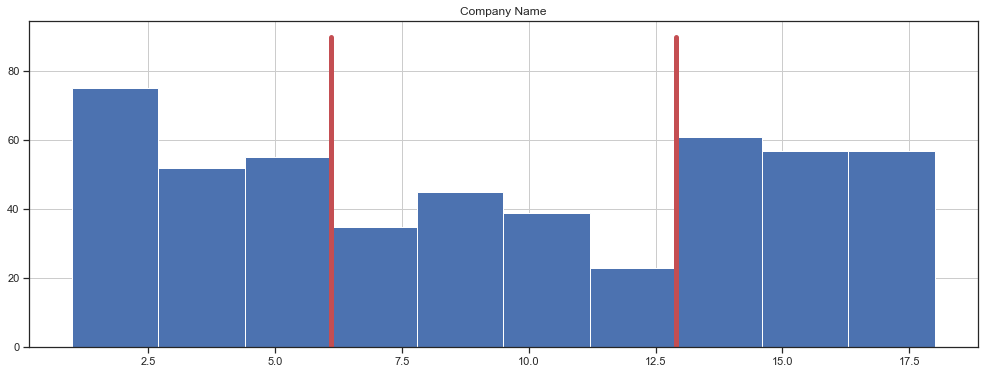

In [14]:
sales_team_agg.hist()
plt.plot(x, z,linewidth = 5, color = 'r')
plt.plot(y, z,linewidth = 5, color = 'r')
plt.show()

Распределение далеко от нормального и показывает что большинство торовых представителей работают: <br> 
1.С большим числом компаний (более 10) <br>
2.С малым числом компаний (менее 6) 

<div class="alert alert-block alert-info">
<b> 2.</b> Далее рассмотрим данные по заказам. <br>
    Первое, что интересно выяснить: процент конверсии и его динамика по датам
</div>      

Для начала, выполним пару действий, для того чтоб подготовить данные к визуализации. <br>
Начнем с проверки дат и их формата

In [15]:
len(order_leads['Company Id'])

100000

In [16]:
type(order_leads['Date'][1])

str

Формат столбца с датами представлен в виде текстового значения. Необходимо конвертировать 

In [17]:
order_leads['Date'] = pd.to_datetime(order_leads['Date'], format='%Y-%m-%d').dt.date

In [18]:
conversion_by_date= order_leads.groupby(order_leads['Date']).mean()['Converted']

In [19]:
conversion_by_date.head(1)

Date
2014-01-01    0.229167
Name: Converted, dtype: float64

In [20]:
sns.set(rc = {'figure.figsize':(17,6)})
sns.set_style("whitegrid")

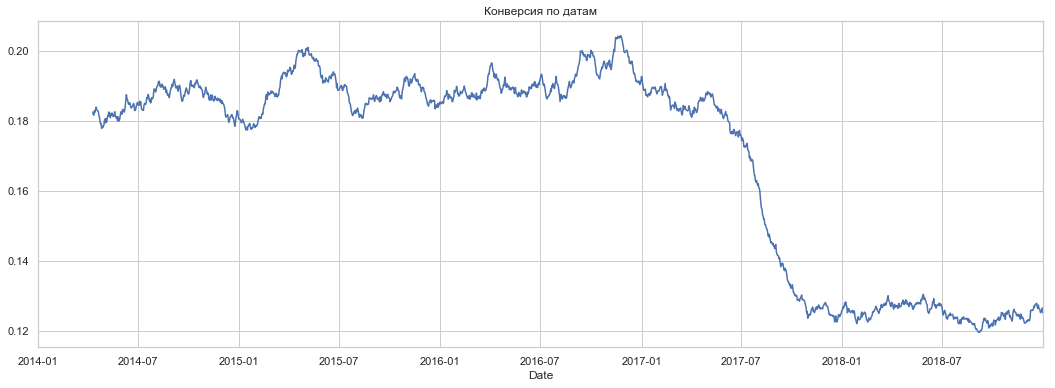

In [21]:
ax =conversion_by_date.rolling(100).mean().plot(figsize=(18,6), title = "Конверсия по датам")
plt.show()

Ух ты, мы наблюдаем существеннное падение конверсии за 2017 год. <br>
Попробуем выяснить с чем это связано

<div class="alert alert-block alert-success">
    
    
    
Версий несколько
<br> 
* Измеримые:
    1. Падение рынка как такового и как следствие падение выручки и потенциальной выручки у компании.
    2. Рост стоимости товара и как следствие снижение числа сделок, но без потерь выручки.
    <br> 
* Факторные:
    1. Снижение качества реализуемого товара
    2. Приход на рынок конкурента    
<br>    
<br>
</div>

Ввиду отсутсвия полной информации о компании, ситуации на рынке и реализуемом товаре, представляется возможным проверить только измеримые версии

Начнем с оценки выручки:

In [22]:
value_by_date= order_leads.groupby(order_leads['Date']).sum()['Order Value']

In [23]:
value_by_date.head(2)

Date
2014-01-01    228331
2014-01-02    293069
Name: Order Value, dtype: int64

Визуализируем 

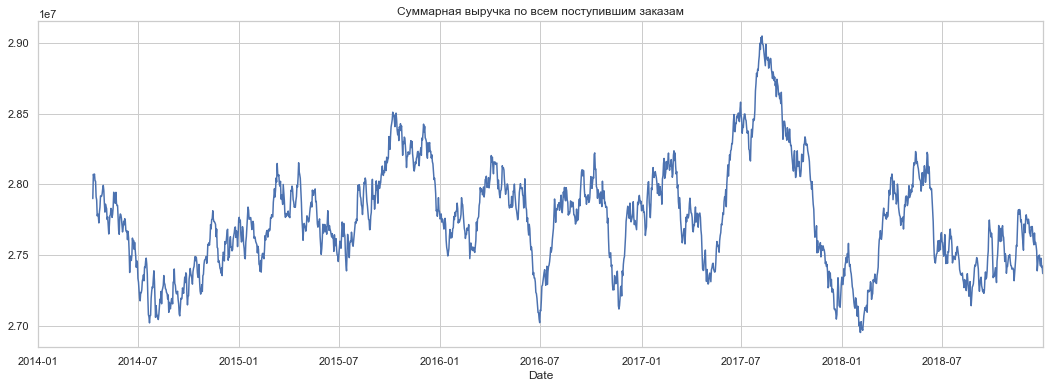

In [24]:
ax =value_by_date.rolling(100).sum().plot(figsize=(18,6), title = "Суммарная выручка по всем поступившим заказам")
plt.show()

Результат удивляет. В 2017 год объем рынка был наибольшим, как следствие версия с падением рынка отпадает.

Остается проверить версию о росте цены

In [25]:
cost_by_date= order_leads.groupby(order_leads['Date']).mean()['Order Value']

In [26]:
cost_by_date.head(2)

Date
2014-01-01    4756.895833
2014-01-02    5635.942308
Name: Order Value, dtype: float64

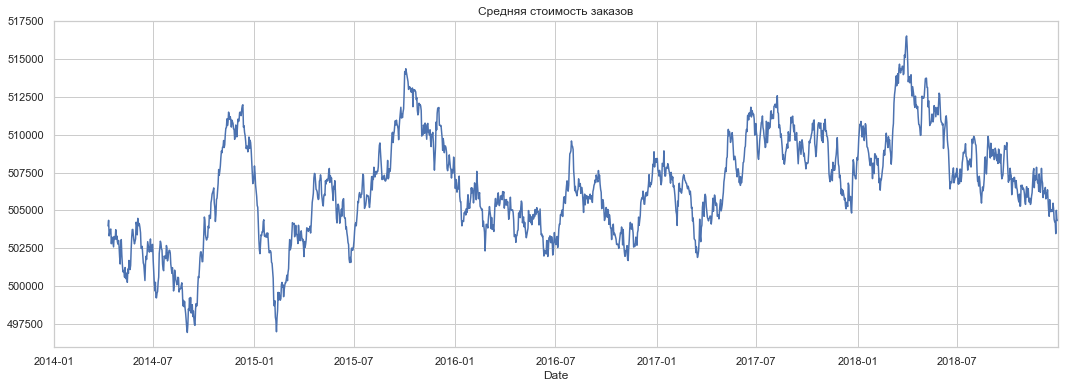

In [27]:
ax =cost_by_date.rolling(100).sum().plot(figsize=(18,6), title = "Средняя стоимость заказов")
plt.show()

Вопреки всем ожиданиям, наблюдается прирост в стоимости заказов. <br>
Вероятно такой прирост может быть связан с закономерным повышением цен ввиду инфляции или иных макроэкономических показателей<br>
Очевидно лишь что такой прирост при прежних объемах заказов не мог бы дать прирост в выручке в таком объеме.

Дабы замкнуть эту цепоку, следует проверить что происходило с кол-вом заказов за рассматриваемый период

In [28]:
count_by_date= order_leads.groupby(order_leads['Date']).count()['Order Value']

In [29]:
count_by_date.head(2)

Date
2014-01-01    48
2014-01-02    52
Name: Order Value, dtype: int64

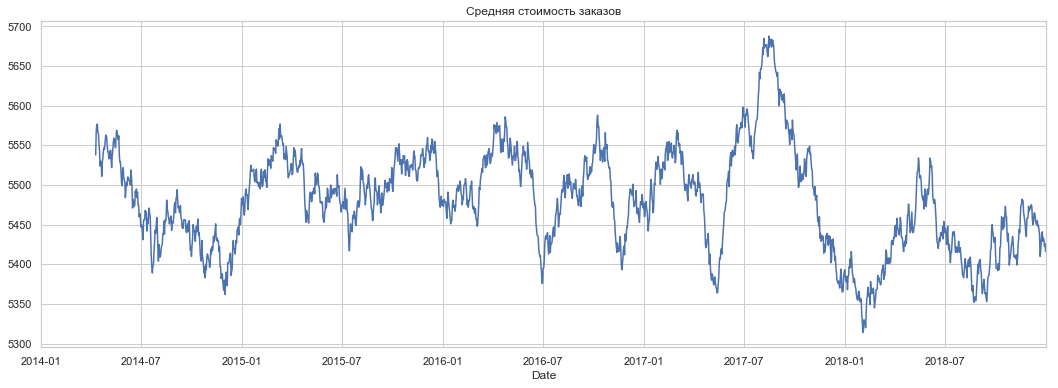

In [30]:
ax =count_by_date= order_leads.groupby(order_leads['Date']).count()['Order Value'].rolling(100).sum().plot(figsize=(18,6), title = "Средняя стоимость заказов")
plt.show()

В данном случае, уже вполне ожидаем рост числа заказов в 2017 году. <br> 
Итого именно рост числа заказов и стоимости заказов повлияли на рост объема рынка в целом. <br>
Но тогда остается неразгаданным вопрос: *"Что с конверсией, Карл?"*

<div class="alert alert-block alert-success">
И выводы тут могут быть представлены лишь в догадках. <br>

Так как мы наблюдаем достаточно ощутимое повышение спроса на товар, который реализует рассматриваемая компания, падение его качества не может дать столь резкого падения конверсии. При снижении качества это происходило бы более плавно, постепенно. <br>

Такой резкий обрыв скорее всего связан с приходом на рынок нового конкурента. <br>

<div>

<div class="alert alert-block alert-success">
    
И здесь уже логика прослеживается =>
 1. Конкурент пытается отобрать долю рынка, тем самым верятно демпингует его ( не исключено что себе в убыток). Такой механизм работы нацелен на "покупку" доли рынка на старте работы.
 2. После захвата рынка необходимо выходить на прибыль, ввиду чего закономерен рост цен у конкурента. Но почему конверсия не возвращается? 
 3. Осуществив повышение цен конкурент  при помощи всевозможных систем лояльности и инструментов присущих данному типу отрасли осуществялет удержание лидов. Данное удержание по видимому и не позволяет рассматриваемой копании вернуть себе конверсию до должного уровня. <br>
 
 <div>

 <div class="alert alert-block alert-success">
    <font color='blue'>Значит, в рамках рассматриваемого задания нам необходимо обратить внимание на аспекты связанные с сервисом компании и, как следсвтие, найти решения, которые позволяет его улучшить.</font> 
 <div>

Вернемся в прежнюю канву исследования. <br>
Мы рассмотрели поотдельности данные команды продаж (sales team) и данные по заказам (order leads)

<div class="alert alert-block alert-info">
<b> 3.</b> Теперь расмотрим данные по счетам на еду. <br>
    Посмотрим еще раз из каких данных состоит этот датасет
</div>      


invoices - содержит информацию о всречах со счетами за обед и участниками встречи
* Meal Id - уникальный номер встречи/ обеда
* Company Id - идентификатор компании, с представителями которой осуществляется встреча.
* Date of Meal - дата, когда была осуществлена встреча с указанием времени встречи
* Participants - участники встречи, со стороны компании
* Meal Price - стоимость обеда

In [31]:
invoices.head(2)

,Meal Id,Company Id,Date of Meal,Participants,Meal Price
0,QBGU1W8BRZZFHYUZ,D0AUXPP07H6AVSGD,2017-10-09 21:00:00,['Violet Medina'],598.0
1,QFNO07V7P3BTJSDK,D0AUXPP07H6AVSGD,2018-06-07 07:00:00,['Connie Harper'],89.0


Первое, что необходимо оценить это участники встречи (Participants) и формат встреч.

In [32]:
print("Уникальных участников- ", len(pd.unique(invoices['Participants'])))
print("Всего встреч- ", len(invoices['Participants']))

Уникальных участников-  27007
Всего встреч-  49990


Встреч почти в 2 раза больше, чем участников встреч. <br>
Похоже что с некоторыми участниками встречались более чем 1 раз. <br>
Посмотрим детальнее:

In [33]:
invoices.groupby(invoices['Participants']).count()['Meal Id'].head()

Participants
['Aaron Boyles']                                                                         4
['Aaron Cavender' 'Tammy Valentine' 'Mary Vail' 'Sarah Bearden'\n 'Steven Thackston']    1
['Aaron Diego' 'Harold Perry' 'Bok Walker' 'Maria Keith']                                1
['Aaron Fall' 'Jessica Delgado']                                                         1
['Aaron Givens' 'Michelle Ruis' 'Keith Carver' 'Juan Smtih']                             1
Name: Meal Id, dtype: int64

Неожиданная информация. Оказывается встречи проходили не только один на один. <br>
Интересно выяснить сколько человек, одновременно присутсвовали на встрече.

Но перед этим, дабы в будущем не делать двойную работу ( связанную с анализом влияния показателей в текущем датасете на конверсию) , объеденим набор данных c order leads.<br> Важно оценить как именно это сделать. <br>
Единственный показатель, присущий в обоих наборах данных это Company Id

In [34]:
print("Кол-во компаний в order_leads = ", len(order_leads['Company Id']))
print("Кол-во компаний в invoices = ", len(invoices['Company Id']))

Кол-во компаний в order_leads =  100000
Кол-во компаний в invoices =  49990


Очевидно, что если мы объеденим наборы данных через company Id то породим тем самым большое кол-во дубликатов. <br>
Выхода нет. Необходимо это сделать и в последующем очистить датасет от дубликатов

In [35]:
orders_invoices =  pd.merge(order_leads, invoices , how='left', on=['Company Id'])

In [36]:
orders_invoices.head(5)

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,QBGU1W8BRZZFHYUZ,2017-10-09 21:00:00,['Violet Medina'],598.0
1,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,QFNO07V7P3BTJSDK,2018-06-07 07:00:00,['Connie Harper'],89.0
2,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,ZDQ15BT9LLWUQ6M8,2014-12-18 20:00:00,['Arthur Lopez'],295.0
3,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,GL1ZVDU85Q9EO4TA,2018-03-05 12:00:00,['Violet Medina' 'Arthur Lopez'],193.0
4,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,42GWYA5XD8NVINY3,2017-06-17 08:00:00,['Arthur Lopez'],348.0


Уже видны дубликаты. Обратите внимание на столбец Order Id. В нем указан номер заказа и по первоначальным данным он должен быть уникален для каждого заказа. В нашем же случае он повторяется

Для начала приведем даты в порядок и разделим столбец в котором указаны дата и время трапезы на два отдельных:
    * Дата трапезы 
    * Время трапезы

In [37]:
type(orders_invoices['Date of Meal'][1])

str

In [38]:
orders_invoices['Meal_Date'] = pd.to_datetime(orders_invoices['Date of Meal'],format='%Y-%m-%d').dt.date

In [39]:
orders_invoices.head(2)

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Meal_Date
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,QBGU1W8BRZZFHYUZ,2017-10-09 21:00:00,['Violet Medina'],598.0,2017-10-09
1,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,QFNO07V7P3BTJSDK,2018-06-07 07:00:00,['Connie Harper'],89.0,2018-06-07


In [40]:
orders_invoices.head(2)

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Meal_Date
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,QBGU1W8BRZZFHYUZ,2017-10-09 21:00:00,['Violet Medina'],598.0,2017-10-09
1,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,QFNO07V7P3BTJSDK,2018-06-07 07:00:00,['Connie Harper'],89.0,2018-06-07


Понятно, что теперь мы можем просто избавиться от дубликатов через drop_duplicates().<br>
Но в таком случае нет уверенности, что мы удалим верные столбцы, как понять должен ли первый столбец остаться или нет? 
<br>
<br>
Очевидно, что используя имеющиеся столбцы мы не сможем точно отделить ложные столбцы от истинных <br>
Потому в ходе бесчисленных проб и ошибок, было определено, что присуствуют аномальные значения в разнице между тем, когда был получен заказ и тем когда принят в работу. Сейчас покажу

У нас есть дата трапезы и дата, когда был осуществлен заказ. Выявим скорость реакции менеджеров

In [41]:
type(orders_invoices['Meal_Date'][1])

datetime.date

In [42]:
orders_invoices['Response rate'] = orders_invoices['Date'] - orders_invoices['Meal_Date']

In [43]:
orders_invoices[['Order Id','Response rate']].head()

,Order Id,Response rate
0,HZSXLI1IS9RGABZW,4 days
1,HZSXLI1IS9RGABZW,-237 days
2,HZSXLI1IS9RGABZW,1030 days
3,HZSXLI1IS9RGABZW,-143 days
4,HZSXLI1IS9RGABZW,118 days


Как видно, присутсвуют как различия в 4 дня так и 237 и это все для одного order_id

Избавимся от знака минус и преобразуем разницу в днях в число ( так с ним проще работать) 

In [44]:
orders_invoices['abs_response rate'] = abs(orders_invoices['Response rate'])

In [45]:
orders_invoices['Response rate'] = (orders_invoices['Response rate'] / np.timedelta64(1, 'D')).astype(int)

In [46]:
orders_invoices['abs_response rate'] = (orders_invoices['abs_response rate'] / np.timedelta64(1, 'D')).astype(int)

In [47]:
orders_invoices[['Order Id','abs_response rate']].head(2)

,Order Id,abs_response rate
0,HZSXLI1IS9RGABZW,4
1,HZSXLI1IS9RGABZW,237


Что у нас получилось: <br> Есть заказ и ряд его дубликатов. В каждой строчке присутсвует "скорость реакции", т.е кол-во дней, спустя которое был ответ на заказ.
Нас интересует строка, в которой "скорость реакции" наименьшая. Вероятно тем самым мы удалим какие то заказы, где скорость ответа была спустя 10, 20, 30 или 200 дней, но такие данные скорее относятся к выбросам и в любом случае искажают оценку. <br>
Потому, ограничим скорость реакции кол-вом дней

In [48]:
orders_with_invoices = orders_invoices[orders_invoices['abs_response rate'] < 7]

Далее, отсортируем заказы в наборе данных так, чтоб строки с наименьшей скоростью реакции были на первом месте и избавимся от дубликатов, оставив только первые значения

In [49]:
orders_with_invoices = orders_with_invoices.loc[(orders_with_invoices['abs_response rate']).sort_values().index]

In [50]:
orders_with_invoices = orders_with_invoices.drop_duplicates(subset='Order Id', keep= 'first')

In [51]:
orders_with_invoices[['Order Id','abs_response rate']].head(5)

,Order Id,abs_response rate
646059,B1VMMGK37R3EB1XG,0
945884,Q73TRIMLLO3PAOWI,0
945869,7DCXH40IG0TVRSLT,0
251937,FKK7OB6Q5Q8IZL0R,0
608415,DJWH3GTUMMFAQPK8,0


Кажется все, но что делать с заказами, в которых отсутсвовали встречи? <br>
Для начала определим их:

При помощи оператора ~ (НЕ) выявив Order Id отсутсвующие в наборе данных со счетами

In [52]:
orders_without_invoices = order_leads[~order_leads['Order Id'].isin(orders_with_invoices['Order Id'].unique())]

In [53]:
orders_without_invoices.head(2)

,Order Id,Company Id,Company Name,Date,Order Value,Converted
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1


In [54]:
len(orders_with_invoices)

53753

In [55]:
len(orders_without_invoices)

46247

In [56]:
len(orders_invoices)

1133041

И теперь просто добавим их в orders_with_invoices тем самым собрав полный датасет без дубликатов

In [57]:
orders_invoices = pd.concat([orders_with_invoices,orders_without_invoices],sort=True)

Избавимся от лишних значений ( abs_response rate, название компании и пр) и поменяем столбцы местами для лучшего восприятия

In [58]:
orders_invoices = orders_invoices[['Order Id', 'Company Id','Meal Id','Date','Date of Meal','Response rate','Order Value','Meal Price','Participants','Converted']]

In [59]:
orders_invoices.head(1)

,Order Id,Company Id,Meal Id,Date,Date of Meal,Response rate,Order Value,Meal Price,Participants,Converted
646059,B1VMMGK37R3EB1XG,D0XKCT6M62KBFIIG,FZR2LNYLKLGPP0SD,2014-06-04,2014-06-04 22:00:00,0.0,2320,172.0,['Crystal Friel'],0


Теперь с этим можно работать

<div class="alert alert-block alert-success">
    
Разберем какие данные можно рассмотреть в orders_invoices:
* Date of Meal , а именно время трапезы
* Response rate и как он влияет на конверсию
* Meal Price и как цена обеда отражается на результате сделки 
* Participant и их число на встрече ( в самом начале мы выяснили что он может быть не один) <br>

Звучит как план
 <div>

<div class="alert alert-block alert-info">
<b> 1.</b>  Начнем с конца. Посмотрим на кол-во и состав участников встречи
</div>
 

Чтоб посчитать кол-во участников на каждой встрече, необходимо очистить столбце "Participants" от лишних символов

In [60]:
orders_invoices['Participants'] = orders_invoices['Participants'].str.replace("\n", "")

In [61]:
orders_invoices['Participants'] = orders_invoices['Participants'].str.replace("' '", ";")

In [62]:
orders_invoices['Participants'] = orders_invoices['Participants'].str.replace("'", '')

In [63]:
orders_invoices['Participants_num'] = orders_invoices['Participants'].str.split(';').str.len()

In [64]:
orders_invoices[['Meal Id','Participants_num']].head(3)

,Meal Id,Participants_num
646059,FZR2LNYLKLGPP0SD,1.0
945884,EENQQ7HS4P0S6C9Z,3.0
945869,P7IIJGEHC7Y2NB6V,3.0


<div class="alert alert-block alert-info">
 Любопытная информация, но пока оставим ее без внимания и добавим еще 1 столбец в набор данных <br>
    <br>
<b> 2.</b>  Время трапезы
</div>
 

Изначально, время трапезы представленно в связке с датой.<br> В таком виде с ним неудобно работать. Отделим его от даты

In [65]:
orders_invoices[['Meal Id','Date of Meal']].head(2)

,Meal Id,Date of Meal
646059,FZR2LNYLKLGPP0SD,2014-06-04 22:00:00
945884,EENQQ7HS4P0S6C9Z,2015-04-22 13:00:00


In [66]:
orders_invoices['Meal Time']= pd.to_datetime(orders_invoices['Date of Meal']).dt.time

In [67]:
orders_invoices[['Meal Id','Meal Time','Participants_num']].head()

,Meal Id,Meal Time,Participants_num
646059,FZR2LNYLKLGPP0SD,22:00:00,1.0
945884,EENQQ7HS4P0S6C9Z,13:00:00,3.0
945869,P7IIJGEHC7Y2NB6V,14:00:00,3.0
251937,YYH1MH2FD0R45PRK,14:00:00,1.0
608415,PFHCVGPNGM3HDWET,14:00:00,1.0


Теперь определим в какое время обычно проходят встречи

In [68]:
pd.unique(orders_invoices['Meal Time'])

array([datetime.time(22, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(20, 0), datetime.time(7, 0), datetime.time(21, 0),
       datetime.time(8, 0), datetime.time(12, 0), datetime.time(9, 0),
       NaT], dtype=object)

Любопытно что вариантов не так уж и много.

Разделим данные интервалы на 4 промежутка:
* Завтрак
* Обед
* Ужин
* Отсутсвие трапезы

In [69]:
orders_invoices['Meal Time'] = orders_invoices['Meal Time'].astype(str)

In [70]:
def label_race (row):
    if row['Meal Time'] == '07:00:00' :
        return 'Breakfast'
    if row['Meal Time'] == '08:00:00' :
        return 'Breakfast'
    if row['Meal Time'] == '09:00:00' :
        return 'Breakfast'
    if row['Meal Time'] == '12:00:00' :
        return 'Lunch'
    if row['Meal Time'] == '13:00:00' :
        return 'Lunch'
    if row['Meal Time'] == '14:00:00' :
        return 'Lunch'
    if row['Meal Time'] == '20:00:00' :
        return 'Dinner'
    if row['Meal Time'] == '21:00:00' :
        return 'Dinner'
    if row['Meal Time'] == '22:00:00' :
        return 'Dinner'
    if row['Meal Time'] == 'NaT' :
        return 'Without Meal'

In [71]:
orders_invoices['Meal Type'] = orders_invoices.apply (lambda row: label_race(row), axis=1)

In [72]:
orders_invoices[['Meal Id','Meal Time','Meal Type','Participants_num']].head()

,Meal Id,Meal Time,Meal Type,Participants_num
646059,FZR2LNYLKLGPP0SD,22:00:00,Dinner,1.0
945884,EENQQ7HS4P0S6C9Z,13:00:00,Lunch,3.0
945869,P7IIJGEHC7Y2NB6V,14:00:00,Lunch,3.0
251937,YYH1MH2FD0R45PRK,14:00:00,Lunch,1.0
608415,PFHCVGPNGM3HDWET,14:00:00,Lunch,1.0


<div class="alert alert-block alert-info">
 Оставим и эти данные пока без внимания. Добавим еще 1 столбец <br>
    <br>
<b> 3.</b>  Доля стоимости обеда в стоимоти заказа
</div>

Учитывая, что у нас изначально есть информация о стоимости заказа и стоимости блюда получить данные не составляет труда

In [73]:
orders_invoices['Share of value'] =(orders_invoices['Meal Price']/orders_invoices['Order Value'])

Представим данные в виде процентов

In [74]:
orders_invoices['Share of value'] = round(orders_invoices['Share of value'].astype('float')*100,0) 

In [75]:
orders_invoices[['Meal Id','Meal Time','Meal Type','Participants_num','Share of value']].head()

,Meal Id,Meal Time,Meal Type,Participants_num,Share of value
646059,FZR2LNYLKLGPP0SD,22:00:00,Dinner,1.0,7.0
945884,EENQQ7HS4P0S6C9Z,13:00:00,Lunch,3.0,9.0
945869,P7IIJGEHC7Y2NB6V,14:00:00,Lunch,3.0,9.0
251937,YYH1MH2FD0R45PRK,14:00:00,Lunch,1.0,7.0
608415,PFHCVGPNGM3HDWET,14:00:00,Lunch,1.0,7.0


Избавимся от ненужных данных  и отсортируем столбцы в таблице

In [76]:
orders_invoices = orders_invoices[['Response rate','Order Value','Share of value','Meal Price','Meal Type','Participants_num','Converted']]

In [77]:
orders_invoices.head()

,Response rate,Order Value,Share of value,Meal Price,Meal Type,Participants_num,Converted
646059,0.0,2320,7.0,172.0,Dinner,1.0,0
945884,0.0,6183,9.0,532.0,Lunch,3.0,1
945869,0.0,9031,9.0,768.0,Lunch,3.0,0
251937,0.0,3158,7.0,227.0,Lunch,1.0,0
608415,0.0,8890,7.0,631.0,Lunch,1.0,0


Получлися набор данных с новыми признаками, анализируя которые можно предложить ряд правил которые позволят увеличить конверсию

### Начнем

<div class="alert alert-block alert-success">
<b> 1.</b>  Meal Type   (Вид трапезы)
</div>

Для начала построим график, показывающи соотношение среднего значения конверсии с временем приема пищи

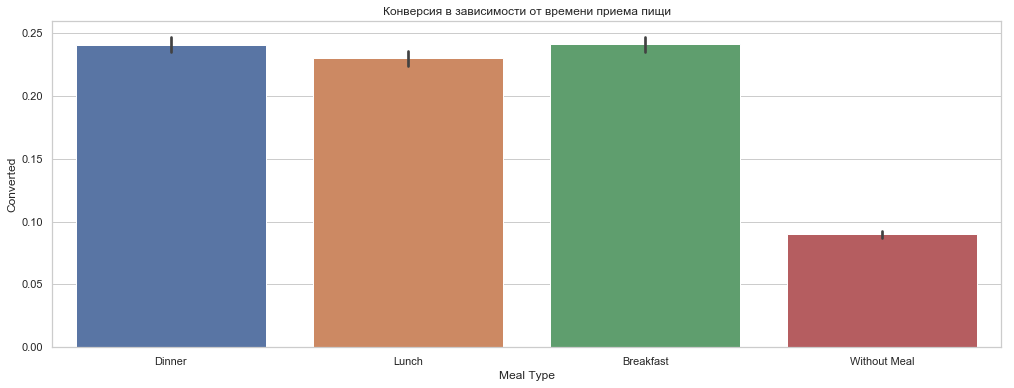

In [78]:
sns.barplot(y="Converted", x="Meal Type", data= orders_invoices, orient = 'v')
plt.title('Конверсия в зависимости от времени приема пищи')
plt.show()

Интересно, хоть и немного ожидаемо: <br>
* Заказы, которые не сопровождались трапезой имеют наименьшую конверсию
* Завтрак и ужин имеют наибольшую конверсию (около 25%)
* Обед имеет конверсию чуть меньше ( порядка 24%) 

Отличия в рамках завтрака, обеда и ужина могут носить характер статистической погрешности. <br>
Ключевым является то, что отсутвие трапезы снижают конверсию почти вдвое!

<div class="alert alert-block alert-success">
<b> 2.</b>  Participants_num ( Кол-во участников встречи)
</div>

Теперь же рассмотри как число участников влияют на итоговую конверсию заказа

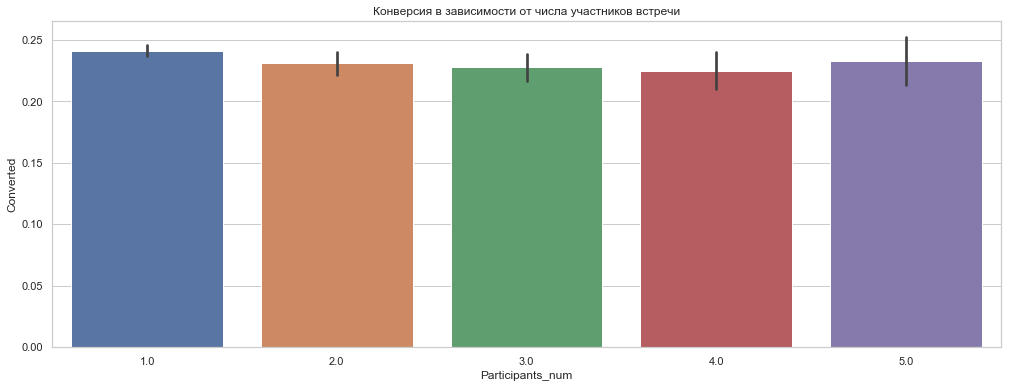

In [79]:
sns.barplot(y="Converted", x="Participants_num", data= orders_invoices, orient = 'v')
plt.title('Конверсия в зависимости от числа участников встречи')
plt.show()

Здесь уже интересней, хоть и первое впечатление разочаровало:
* Чем больше человек на встрече, тем ниже конверсия
* Но это правило работает только до 5 человек, там конверсия вновь возрастает. <br>
Попробуем определить с чем это связано:

In [80]:
print("Кол-во встреч с 5-ю участника",orders_invoices[orders_invoices['Participants_num']== 5].count()['Converted'])
print("Всего встреч",orders_invoices[orders_invoices['Participants_num']>0].count()['Converted'])
print("Доля встреч с 5-ю участниками в общей доле встреч",round(orders_invoices[orders_invoices['Participants_num']== 5].count()['Converted']/orders_invoices[orders_invoices['Participants_num']>0].count()['Converted']*100,2),"%")

Кол-во встреч с 5-ю участника 1583
Всего встреч 53753
Доля встреч с 5-ю участниками в общей доле встреч 2.94 %


Ага, встречи с 5-ю участниками составляют менее 3% от общего числа встреч. <br>
Исходя из этого будет достаточно сомнительным делать вывод опираясь на столью малую выборку. <br>

Сформулируем тезис следующим образом: <br>
Чем меньше участников на встрече - тем выше конверсия ( только в случае если вы не устраиваете вечеринку) 
    

<div class="alert alert-block alert-success">
<b> 3.</b> Response rate (Скорость ответа на заказ)
</div>

Далее, оценим как влияют ранние/поздние ответы на заказ

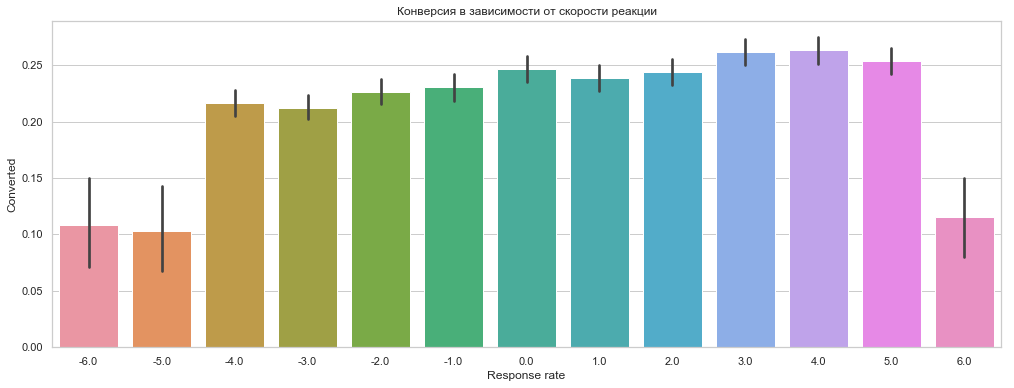

In [81]:
sns.barplot(y="Converted", x="Response rate", data= orders_invoices, orient = 'v')
plt.title('Конверсия в зависимости от скорости реакции')
plt.show()

Достаточно неоднозначно:
* Встречи организованные до поступления заказа в систему имеют меньшую конверсию, нежели встречи организованные после. <br>
Это можно трактовать как то, что встречи, организованные с целью предложить услугу имеют меньша шансов быть сконвертированы, нежели встречи, организованные с уже заинтересованным покупателем
* Наибольшую конверсию встречи организованные в день заказа, либо на 3 и 4-ый день после осуществления заказа
* После 5-го дня конвесия существенно падает

Исходя из этого: <br>
Необходимо снизить кол-во ранних встреч и организовывать встречи не позднее 5-го дня, после поступления заказа в систему

<div class="alert alert-block alert-success">
<b> 4.</b> Share of value (Доля стоимости обеда в стоимости заказа)
</div>

Так же, интересным будет оценить какую долю в стоимости заказа, должна составлять стоимость обеда для максимизации конверсии

Избавимся от выбросов и аномальных значений, ограничив выборку 20%

In [82]:
df = orders_invoices[orders_invoices['Share of value'] < 20]

Теперь визуализируем данные

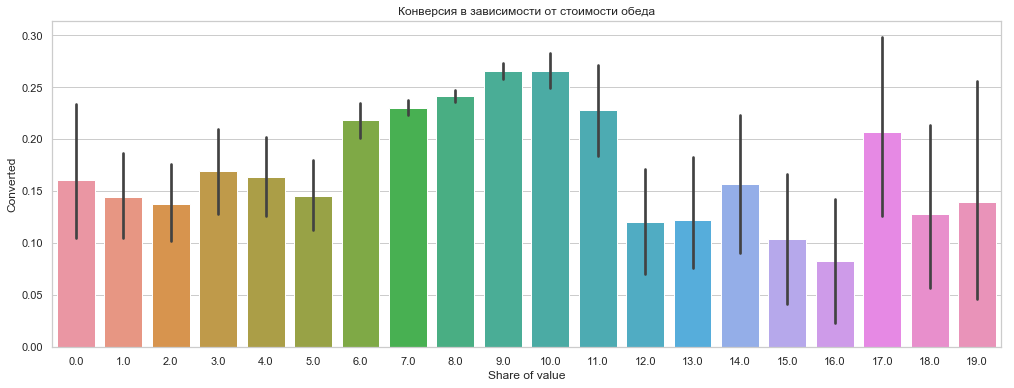

In [83]:
sns.barplot(y="Converted", x="Share of value", data= df, orient = 'v')
plt.title('Конверсия в зависимости от стоимости обеда')
plt.show()

Здесь же все достаточно просто:
* Максимальный уровень конверсии достигается при доле в 9-10% от стоимости заказа. <br>
* Допустимым является уровень в 6-8%. В таком случае конверсия меньше, но все еще превышает 20%

Для полного ответа о наиболее оптимальной доле стоимости обеда в стоимости заказа немаловажным будет оценить рентабельность продуции. Вероятно 9-10% помогут увеличить конверсию, но вместе с тем такие затраты уведут сделку в убыток. 

<div class="alert alert-block alert-success">
<b> 5.</b> Company num (Кол-во компаний, с которыми взаимодействует торговый представитель)
</div>

В самом начале, на этапе рассмотрения набора данных sales_team мы оценивали с каким кол-вом компаний взаимодействует торговый представитель. <br>
По итогу удалось определить, что многие торговые представители работают сразу с несколькими компаниями.<br>
Напомню:

In [84]:
sales_team_agg.head()

,Sales Rep,Company Name
0,Aaron Hendrickson,13
1,Adam Sawyer,16
2,Adele Kimmel,5
3,Adrian Daugherty,18
4,Adrianna Shelton,2


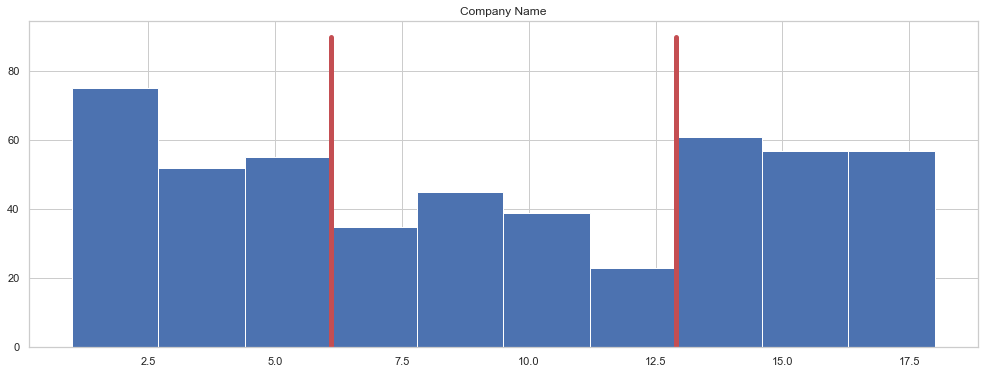

In [85]:
sales_team_agg.hist()
plt.plot(x, z,linewidth = 5, color = 'r')
plt.plot(y, z,linewidth = 5, color = 'r')
plt.show()

Теперь же интересно было бы оценить как кол-во компаний, с которыми взаимодействует торговый представитель влияют на конверсию сделки

Для начала необходмимо объеденить наборы данных sales_team и order_leads для того , чтоб связать кол-во компаний с показателем конверсии. <br>
Здесь, в отличие от предыдущего объединения все намного проще, т.к анализировать будем среднее значение конверсии по нашим торговым представителям. <br>
Фактор дублирования по мат.признакам не играет роли

In [86]:
team_orders = pd.merge(sales_team,order_leads,on=['Company Id','Company Name'])

In [87]:
team_orders.head(2)

,Sales Rep,Sales Rep Id,Company Name,Company Id,Order Id,Date,Order Value,Converted
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD,HZSXLI1IS9RGABZW,2017-10-13,6952,0
1,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD,582WPS3OW8T6YT0R,2017-09-02,7930,0


Для начала оценим распределение конверсии по торговым представителям, возможно удасться выявить неоднознаную закономерность

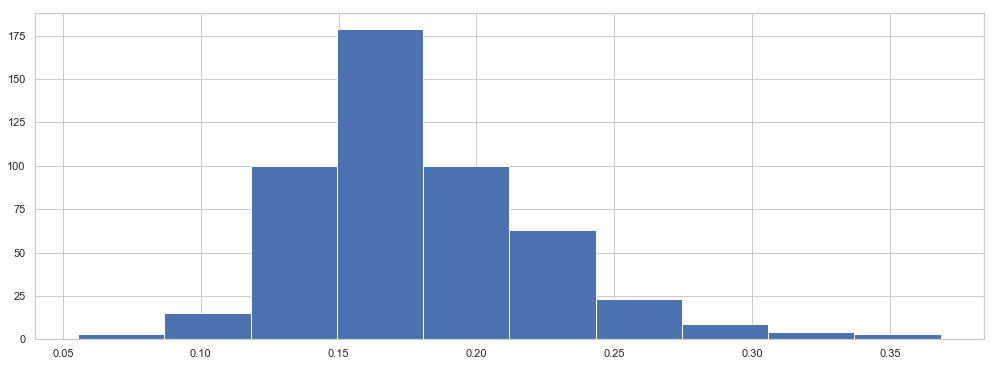

In [88]:
team_orders.groupby('Sales Rep').mean()['Converted'].hist()
plt.show()

По итогу наблюдаем нормальное распределение с небольшим эксцессом влево.<br> Наибольшее число торговых представителей работают с конверсией от 15 до 17.5%. <br>


Но кое что интересное мы здесь можем увидеть: <br>
Проаналировав ряд признаков выше, мы определи что при соблюдении определенных правил средний коэффицент конверсии в 20% более чем достижим. В данном же случае мы выдим что преобладающее большинство менеджеров его не достигают. <br>
Попробуем определить что в работе самих менеджеров позволит увеличить эффективность

Для начала осуществим группировку по торговым представителям

In [89]:
Company_num_convertion = team_orders.groupby("Sales Rep").agg({
    "Company Name": pd.Series.nunique,
    "Converted": np.mean}).reset_index()

И переименуем столбец, дабы он не вводил в заблуждение

In [90]:
Company_num_convertion.rename(columns={'Company Name': 'Company_num'}, inplace=True)

In [91]:
Company_num_convertion.head(5)

,Sales Rep,Company_num,Converted
0,Aaron Hendrickson,13,0.157534
1,Adam Sawyer,16,0.148148
2,Adele Kimmel,5,0.173913
3,Adrian Daugherty,18,0.138211
4,Adrianna Shelton,2,0.216216


Далее, нам необходимо понять при каком кол-ве компаний конверсия наибольшая<br> 
НО немаловажным будет определить не максимальное достижимое значение конверсии, а максимально частое достижимое наибольшей конверсии <br>
Т.е случаи когда <br>
100 из 150 торговых представителей в среднем работают с конверсией в 20% нас интересует больше нежели <br>
 20 из 150, работающих с конверсией в 25% а оставшиеся с конверсией в 10%


Потому добавим в набор данных еще показатель среднеквадратичного отклонения. <br> Для этого необходимо немного видоизменить набор данных

In [92]:
df_= Company_num_convertion.groupby(['Company_num']).Converted.agg({'std', 'mean'}).reset_index()

In [106]:
df_.head(15)

,Company_num,mean,std
0,1,0.191610,0.081873
1,2,0.210302,0.056405
2,3,0.196716,0.065544
3,4,0.202562,0.034171
4,5,0.194920,0.042252
5,6,0.191427,0.040364
6,7,0.195505,0.032706
7,8,0.195512,0.026234
8,9,0.191260,0.029156
9,10,0.179160,0.022579


In [107]:
df_.head(10)

,Company_num,mean,std
0,1,0.191610,0.081873
1,2,0.210302,0.056405
2,3,0.196716,0.065544
3,4,0.202562,0.034171
4,5,0.194920,0.042252
5,6,0.191427,0.040364
6,7,0.195505,0.032706
7,8,0.195512,0.026234
8,9,0.191260,0.029156
9,10,0.179160,0.022579


Разберем детальней: Наибольшая конверсия (в среднем) достигается при взаимодействии с 4-мя компаниями (20.2%), но при этом отклонение составляет  0.034. Т.е это тот случай когда данные распределены в обе стороны и при работе с 4-мя компания может достигаться как высокая конверсия в 20% так и предельно низкая.<br> Иными словами это тот случай когда 130 из 150 торговых представителей могут работать с конверсией в 10%

Попробуем определить число компаний с меньшим отклонением

In [108]:
df_

,Company_num,mean,std
0,1,0.191610,0.081873
1,2,0.210302,0.056405
2,3,0.196716,0.065544
3,4,0.202562,0.034171
4,5,0.194920,0.042252
5,6,0.191427,0.040364
6,7,0.195505,0.032706
7,8,0.195512,0.026234
8,9,0.191260,0.029156
9,10,0.179160,0.022579


Можно увидеть, что наименьший "разброс" (среднеквадратичное отклонение) у торговых представителей работающих с 16 компаниями. <br> Но при этом средний показатель конверсии составляет 15%. Неплохая диверсификация рисков, но попробуем найти золотую середину

И в данном случае "золотой серединой" является число компаний 8 и 9.

In [98]:
df_[5:12]

,Company_num,mean,std
5,6,0.191427,0.040364
6,7,0.195505,0.032706
7,8,0.195512,0.026234
8,9,0.191260,0.029156
9,10,0.179160,0.022579
10,11,0.172445,0.028843
11,12,0.171645,0.021837


У торговых представителей работающих с данным числом компаний лучшее соотношение средней конверсии и "разброса".
* После 7 конверсия незначительно снижается но существенно падает значение "разброса"
* После 9 конвесия падает существенно

Закрепим данный вывод, рассмотрев визуализацию данных

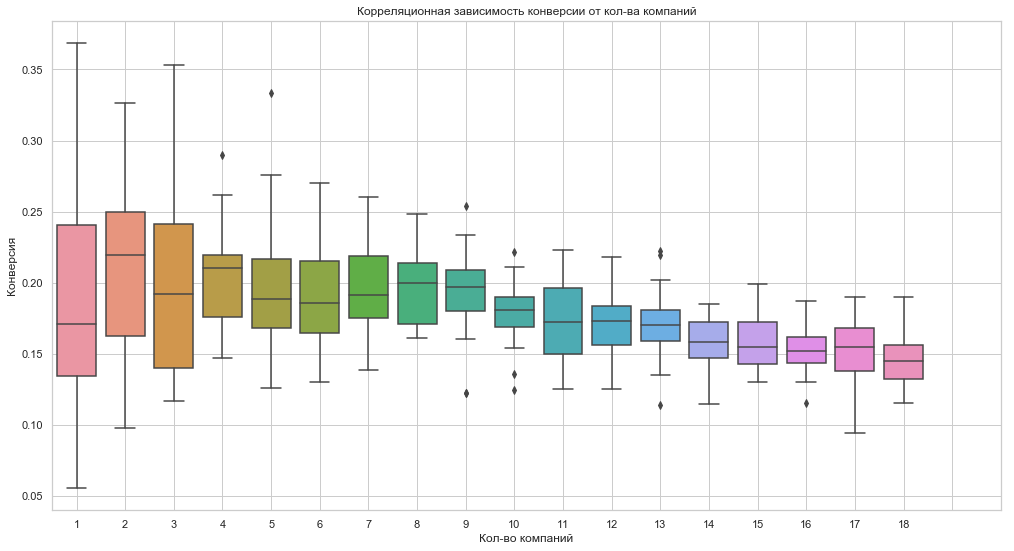

In [105]:
sns.boxplot(x= Com_num, y=Con_rate,data=Company_num_convertion)
plt.xlabel('Кол-во компаний')
plt.ylabel('Конверсия')
plt.title('Корреляционная зависимость конверсии от кол-ва компаний')
plt.xticks(np.arange(0, 20, step=1))
plt.grid(True)
plt.show()

На графике можно найти подтверждение сформлированным выводам:
* По мере увеличения числа аккаунтов ширина боксплота уменьшается, т.е уменьшается и тот самый разброс по возможному проценту конверсии.
Так в случае с 3-мя аккаунтами возможна конверсия как и почти 25% так и менее 15%п при среднем значении в 19% и это все еще не учитывая выбросы.
* По мере увеличения числа аккаунтов можно наблюдать как боксплот приобретает все более "сплюснутый" вид, но при это и значение средней конверсии падает.

Выгоднее всего смотритя число в 8 и 9 акканутов. Данное число имеет достаточно низкий разброс при высоком уровне конверсии.
При увеличении числа аккаунтов конверсия резко падает, а при снижении сущесвтенно возрастает размах
    

По мере увеличения числа аккаунтов "пик" графика заостряется, что означает, что торговый представитель работает в более узком "размахе " конверсии. <br>
Но при этом немаловажно наблюдать и за смещением пика относительно центра графика ( показатель конверсии в 20%). <br>
Чем больше график смещен от центра , тем ниже средний показатель конверсии.<br>
Потому в данном случае нам наиболее интересен вытянутый график, большая часть которого находится правее центра

Попробуем представить визуализацию в другом виде

In [100]:
Com_num = Company_num_convertion['Company_num']
Con_rate = Company_num_convertion['Converted']


In [101]:
sns.set(rc = {'figure.figsize':(17,9)})
sns.set_style("whitegrid")

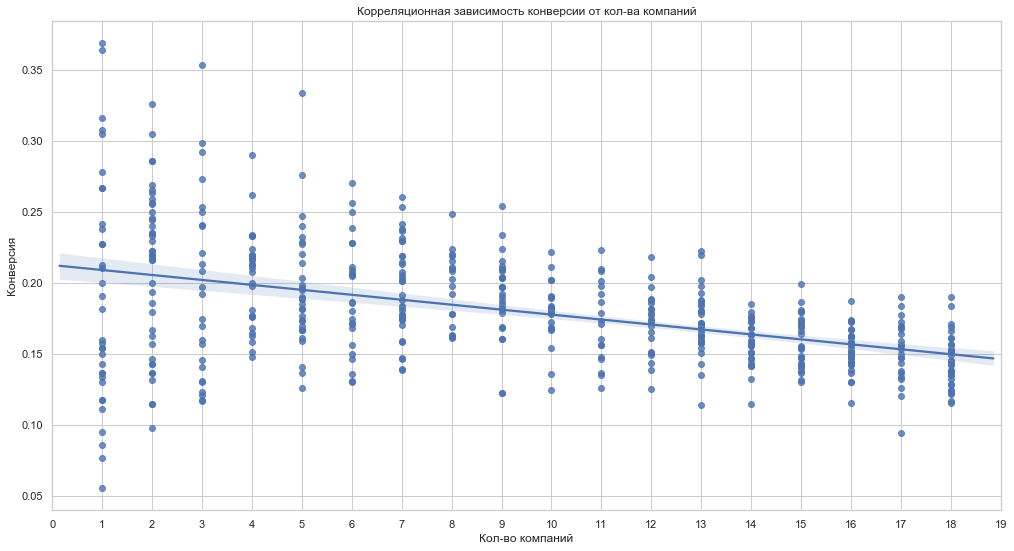

In [103]:
sns.regplot(x= Com_num, y=Con_rate,data=Company_num_convertion, fit_reg=True)
plt.xlabel('Кол-во компаний')
plt.ylabel('Конверсия')
plt.title('Корреляционная зависимость конверсии от кол-ва компаний')
plt.xticks(np.arange(0, 20, step=1))
plt.grid(True)
plt.show()

На данном графике каждая точка обозначает каждую сделку.<br>
И тут уже можно наблюдать что при малом числе аккаунтов точки распределены от конверсии в 5% до 35%, при том лишь малая их часть составляет 20% <br>
По мере увеличения числа компаний мы наблюдаем что точки все чаще располагаются ближе к центру т.е снижается разброс показателя конверсия. <br>
И так же, отчетливо видно, что при 8-9-ти компания большинство точек ( случаев) находятся выше линии регрессии, имея достаочно малый размах.

<div class="alert alert-block alert-success">

### Подведем итоги

<div>

Проанализировав представленные данные удалось сформировать ряд правил, которые позволят повысить уровень конверсии:

1. Каждый заказ обязательно должен сопровождаться трапезой. <br> 
Наличие трапезы удваивает конверсию
2. Наивысшая конверсия достигается в случае, когда стоимость трапезы составляет 9-10% от стоимости заказа. Допустимой является доля в 6% , но все что ниже существенно снижает конверсию
3. Лучше всего проводить встречи 1 на 1. В таком случае показатель конверсии максимален
4. Не стоит устраивать встречи, до того как осуществлен заказ, это негативно влияет на конверсию.
5. Торговым представителям стоит работать с 8-9 компаниями. Данное число компаний позволит добиться наиболее оптимальных показателей